In [1]:
import tensorflow as tf

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [15]:
test_image = mnist.test.images[1]
test_image

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [16]:
test_image.shape

(784,)

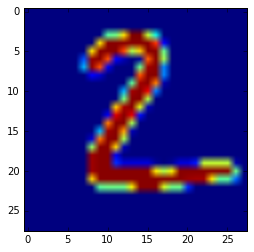

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

test_image.shape = (28,28)

plt.imshow(image)

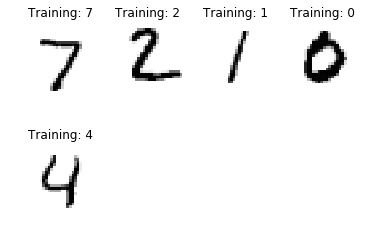

In [28]:
import numpy as np
images_and_labels = list(zip(mnist.test.images[:5], mnist.test.labels[:5]))
for index, (image, label) in enumerate(images_and_labels):
    plt.subplot(2, 4, index + 1)
    image.shape = (28,28)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % np.argmax(label))

In [37]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x, W) + b)

y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})


In [38]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9144


In [39]:
print(sess.run(correct_prediction, feed_dict={x:mnist.test.images, y_:mnist.test.labels}))


[ True  True  True ...,  True  True  True]


sample output : [4 0 1 3 1 3 6 7 2]
compare : ['T', 'T', 'T', 'T', 'T', 'T', 'F', 'T', 'T']
sample output : [7 1 2 1 1 7 4 2 3]
compare : ['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T']
sample input : 


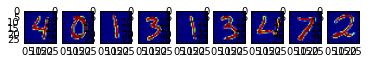

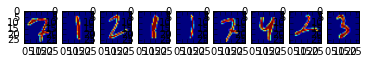

In [45]:
for i in range(2):
    result_boolean = []
    batch_x, batch_y = mnist.test.next_batch(9)
    diff_a = sess.run(tf.argmax(y,1), feed_dict={x:batch_x})
    diff_b = sess.run(tf.argmax(y_,1), feed_dict={y_:batch_y})
    print ("sample output : " + str(diff_a))

    for k in range(9):
        if diff_a[k] == diff_b[k]:
            result_boolean.append("T")
        else:
            result_boolean.append("F")
    print ("compare : " + str(result_boolean))

    plt.figure(i)
    coordi = [191, 192, 193, 194, 195, 196, 197, 198, 199]

    for index, image in enumerate(batch_x):
        image.shape = (28,28)
        plt.subplot(coordi[index])
        plt.imshow(image)
print ("sample input : ")